<a href="https://colab.research.google.com/github/atharvv8/Restaurant_Reviews_Analysis/blob/main/Sentiment_Analysis_of_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Reading Dataset**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/atharvv8/Restaurant_Reviews_Analysis/main/restaurantReviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
df['Liked'].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

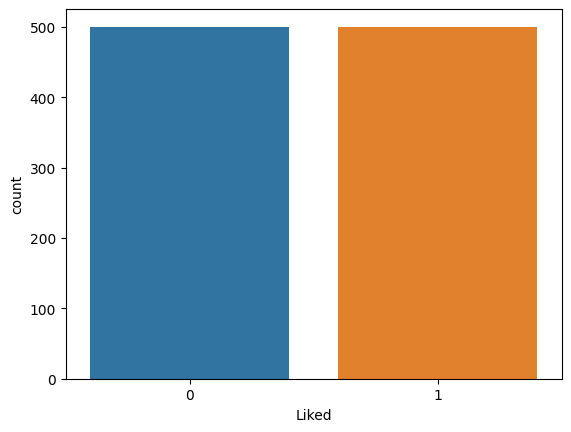

In [4]:
sns.countplot(x='Liked', data=df)
plt.show()

In [5]:
count_good_reviews = len(df.loc[df['Liked'] == 1])
count_bad_reviews=len(df.loc[df['Liked']==0])
(count_good_reviews, count_bad_reviews)

(500, 500)

**Cleaning Dataframe**

In [6]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    #remove negative word 'not' as it is closest word to help determine whether the review is good or not
    review = [stemmer.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [8]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 107)

**Training Classifier Model**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=12)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
#GaussianNB
gnb = GaussianNB(var_smoothing=1e-2)
cv = cross_val_score(gnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_gnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_gnb)
print(cm)

[0.76119403 0.7761194  0.79104478 0.74626866 0.74626866 0.64179104
 0.76119403 0.65671642 0.72727273 0.62121212 0.77272727 0.75757576]
72.9948741142771
The accuracy of the Naive Bayes is 71.5
[[62 36]
 [21 81]]


In [12]:
y_pred_gnb

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [14]:
score1 = accuracy_score(y_test, y_pred_gnb)
score2 = precision_score(y_test, y_pred_gnb)
score3 = recall_score(y_test, y_pred_gnb)

print("-----------Scores-----------")
print("Accuracy score is: {}%".format(round(score1*100, 2)))
print("Precision score is: {}%".format(round(score2*100, 2)))
print("Recall score is: {}%".format(round(score3*100, 2)))

-----------Scores-----------
Accuracy score is: 71.5%
Precision score is: 69.23%
Recall score is: 79.41%


Text(95.72222222222221, 0.5, 'Actual values')

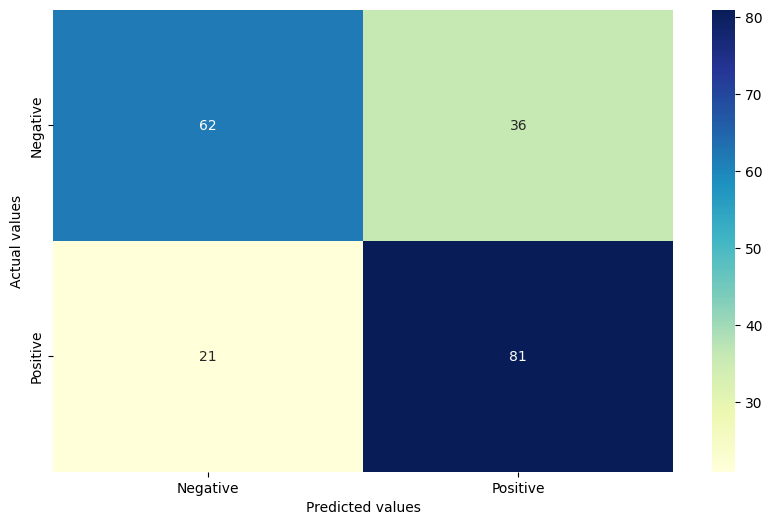

In [15]:
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [16]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1, 1.1, 0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha = ", i, " is : ", round(score*100, 2))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print()
print("Best accuracy is: ", round(best_accuracy*100, 2), " with aplha value: ", alpha_val)

Accuracy score for alpha =  0.1  is :  80.0
Accuracy score for alpha =  0.2  is :  80.5
Accuracy score for alpha =  0.30000000000000004  is :  81.5
Accuracy score for alpha =  0.4  is :  81.5
Accuracy score for alpha =  0.5  is :  81.5
Accuracy score for alpha =  0.6  is :  82.0
Accuracy score for alpha =  0.7000000000000001  is :  82.0
Accuracy score for alpha =  0.8  is :  82.0
Accuracy score for alpha =  0.9  is :  82.0
Accuracy score for alpha =  1.0  is :  81.5

Best accuracy is:  82.0  with aplha value:  0.6


In [17]:
#MultinomialNB
mnb = MultinomialNB(alpha=0.6)
cv = cross_val_score(mnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_mnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_mnb)
print(cm)

[0.76119403 0.8358209  0.86567164 0.85074627 0.82089552 0.73134328
 0.85074627 0.71641791 0.75757576 0.71212121 0.71212121 0.77272727]
78.22817729534148
The accuracy of the Naive Bayes is 82.0
[[81 17]
 [19 83]]


In [18]:
y_pred_mnb

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1])

In [19]:
score1 = accuracy_score(y_test, y_pred_mnb)
score2 = precision_score(y_test, y_pred_mnb)
score3 = recall_score(y_test, y_pred_mnb)

print("-----------Scores-----------")
print("Accuracy score is: {}%".format(round(score1*100, 2)))
print("Precision score is: {}%".format(round(score2*100, 2)))
print("Recall score is: {}%".format(round(score3*100, 2)))

-----------Scores-----------
Accuracy score is: 82.0%
Precision score is: 83.0%
Recall score is: 81.37%


Text(95.72222222222221, 0.5, 'Actual values')

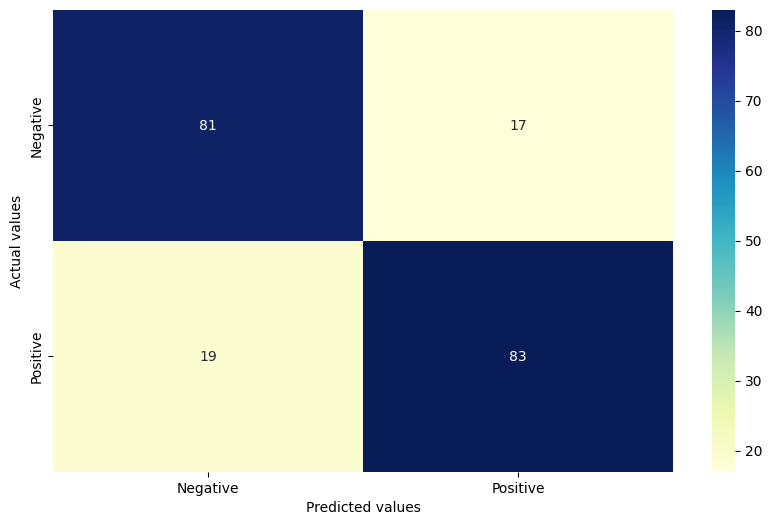

In [20]:
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [21]:
#Random Forest Classifier
rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', min_samples_leaf=2,
                       n_estimators=500, random_state=0)
rf.fit(X_train, y_train)
cv = cross_val_score(rf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_rf = rf.predict(X_test)
print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(y_pred_rf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_rf)
print(cm)

[0.7761194  0.85074627 0.85074627 0.8358209  0.80597015 0.70149254
 0.7761194  0.71641791 0.74242424 0.72727273 0.75757576 0.78787879]
77.73820292477008
The accuracy of the RandomForestClassifier is 80.0
[[81 17]
 [23 79]]


In [22]:
y_pred_rf

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1])

In [23]:
score1 = accuracy_score(y_test, y_pred_rf)
score2 = precision_score(y_test, y_pred_rf)
score3 = recall_score(y_test, y_pred_rf)

print("-----------Scores-----------")
print("Accuracy score is: {}%".format(round(score1*100, 2)))
print("Precision score is: {}%".format(round(score2*100, 2)))
print("Recall score is: {}%".format(round(score3*100, 2)))

-----------Scores-----------
Accuracy score is: 80.0%
Precision score is: 82.29%
Recall score is: 77.45%


Text(95.72222222222221, 0.5, 'Actual values')

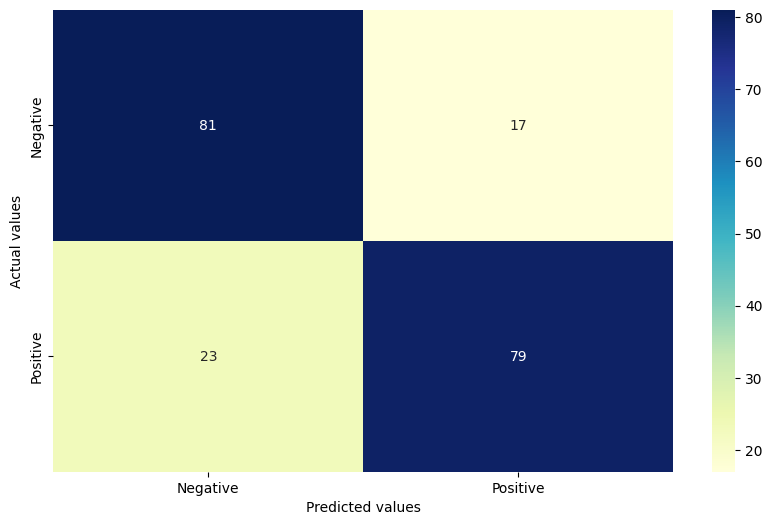

In [24]:
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')